In [1]:
import numpy as np
import pandas as pd

from IPython.display import Image 
from matplotlib import pyplot as plt

# 3. Перевод слова в вектор

#### Каждое слово - вектор в некотором пространтсве. Наша задача - найти наилучшее пространтсво векторов.

## Хотелка: чтобы векторное расстояние между похожими по смыслу словами было меньше, чем между не похожими. 



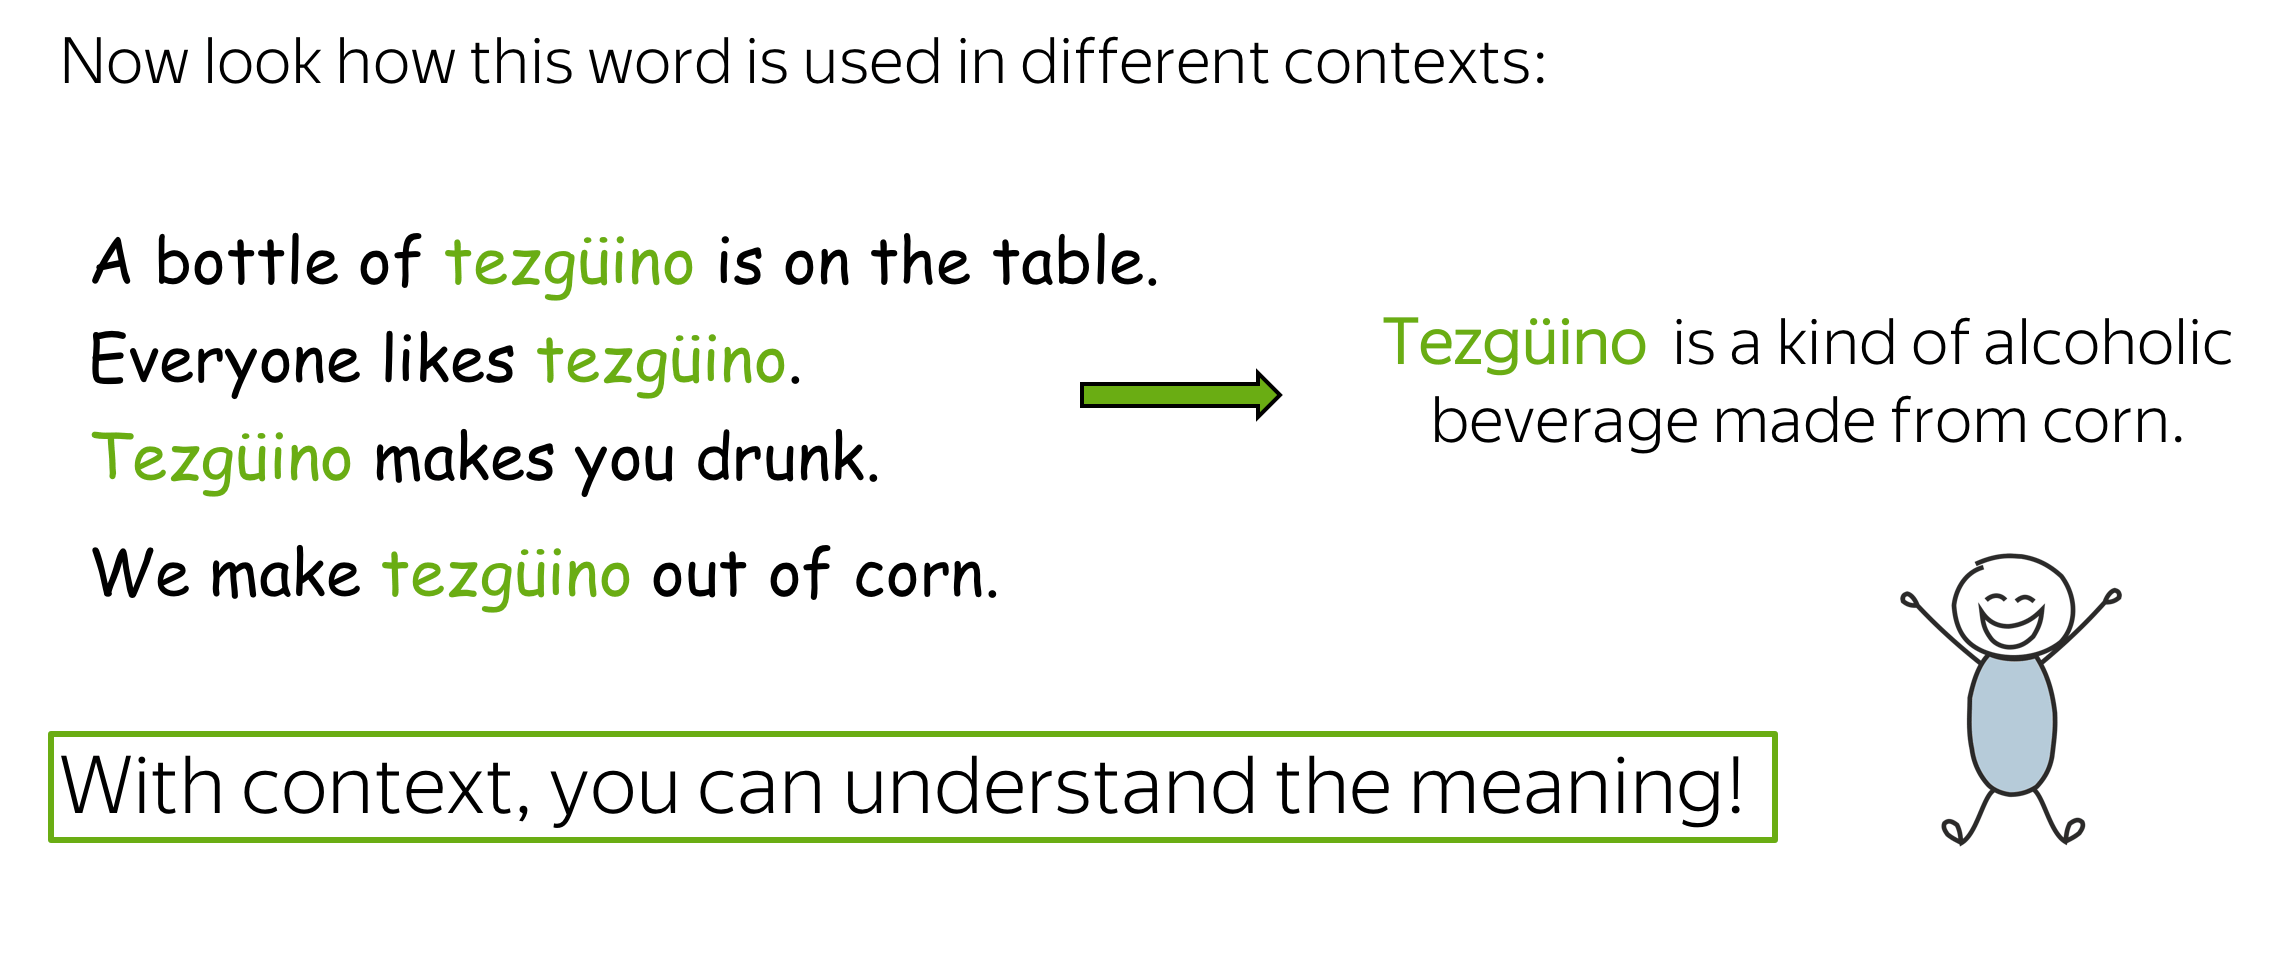

In [41]:
Image('images/tezguino2-min.png', width=600)

Image('images/tezguino3-min.png', width=600)

## 3.1 Co-occurrence counts

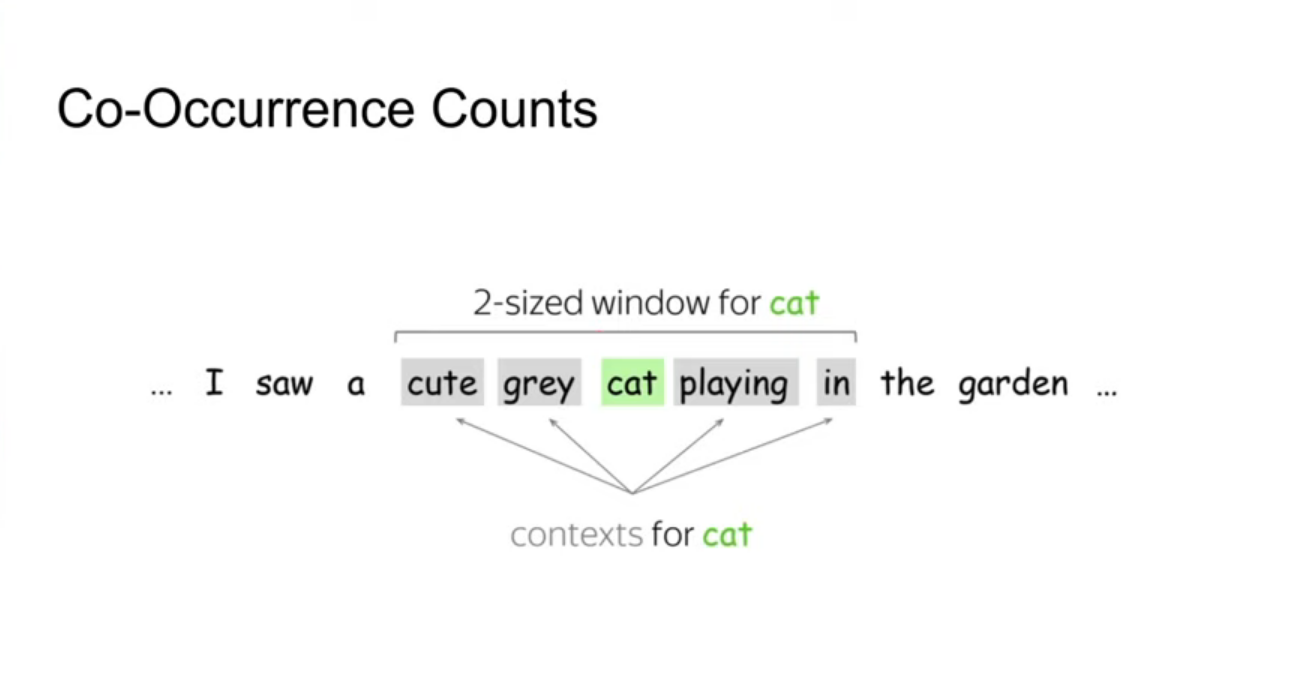

In [4]:
Image('images/co-occurence.png', width=600)

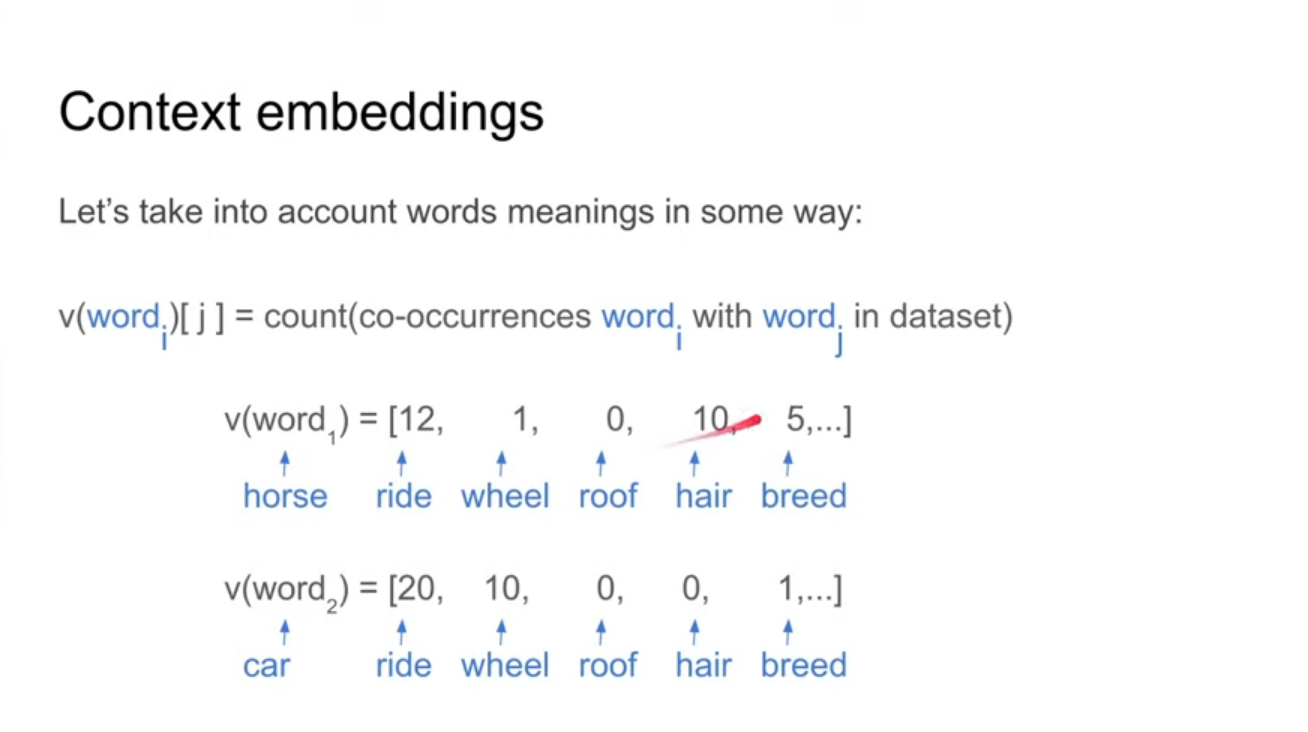

In [3]:
Image('images/context_embeddings.png', width=600)

Сделаем co-occurence для примера. У нас есть 3 предложения и окно длины 3 (одно слово до, по центру и после) 

In [43]:
X = ['I enjoy flying',
     'I like trains ',
     'I like taxi']

coocc = pd.DataFrame(
             index   = ['I', 'enjoy', 'like', 'flying', 'trains', 'taxi'],
             columns = ['I', 'enjoy', 'like', 'flying', 'trains', 'taxi'],
             data = np.array([[0, 1, 2, 0, 0, 0],
                              [1, 0, 0, 1, 0, 0],
                              [2, 0, 0, 0, 1, 1],
                              [0, 1, 0, 0, 0, 0],
                              [0, 0, 1, 0, 0, 0],
                              [0, 0, 1, 0, 0, 0]]))

In [44]:
coocc

,I,enjoy,like,flying,trains,taxi
I,0,1,2,0,0,0
enjoy,1,0,0,1,0,0
like,2,0,0,0,1,1
flying,0,1,0,0,0,0
trains,0,0,1,0,0,0
taxi,0,0,1,0,0,0


Слова с идентичными контекстами имеют одинаковые вектора.

Однако понятно, что при очень большом словаре, мы получим матрицу гигантских размеров, которую неудобно хранить. Поэтому воспользуемся SVD разложением, чтобы уменьшить размер словаря.

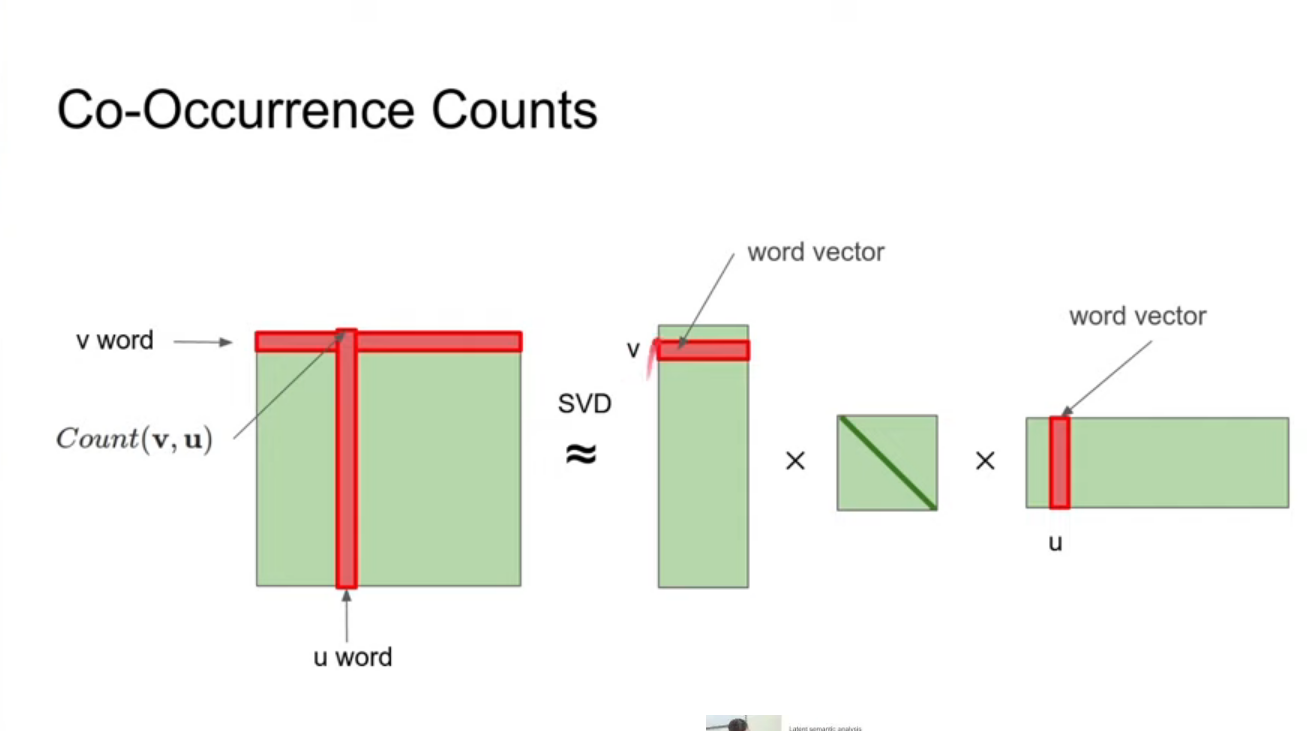

In [9]:
Image('images/SVD.png', width=600)

In [45]:
u, s, vh = np.linalg.svd(coocc)

In [5]:
s

array([2.61312593e+00, 2.61312593e+00, 1.08239220e+00, 1.08239220e+00,
       8.10371908e-17, 5.47284008e-33])

In [46]:
U = np.round(u,3)[:,:3]
S = np.eye(3) * s[:3]
VT = np.round(vh,3)[:3,:]

In [47]:
U

array([[ 0.854,  0.   , -0.   ],
       [-0.   , -0.383, -0.924],
       [ 0.   , -0.924,  0.383],
       [ 0.146,  0.   , -0.   ],
       [ 0.354,  0.   , -0.   ],
       [ 0.354,  0.   , -0.   ]])

In [48]:
np.round(U.dot(S).dot(VT), 1)

array([[ 0. ,  0.9,  2.1,  0. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ,  1. ,  0. ,  0. ],
       [ 2. ,  0. ,  0. , -0. ,  1. ,  1. ],
       [ 0. ,  0.1,  0.4,  0. ,  0. ,  0. ],
       [ 0. ,  0.4,  0.9,  0. ,  0. ,  0. ],
       [ 0. ,  0.4,  0.9,  0. ,  0. ,  0. ]])

Заметим, что у схожих векторов и после сокращения размерностей вектора похожи.

In [9]:
from scipy.spatial.distance import cosine

In [49]:
# между глаголами enjoy и like
cosine(np.array([-0.   , -0.383, -0.   ]),
       np.array([ 0.   , -0.924,  0.   ]))

0.0

In [11]:
# между flying и trains
cosine([ 0.146,  0.   , -0.854],
       [ 0.354,  0.   ,  0.354])

1.5778361689253098

In [12]:
# между taxi and trains
cosine([ 0.354,  0.   ,  0.354],
       [ 0.354,  0.   ,  0.354])

0.0

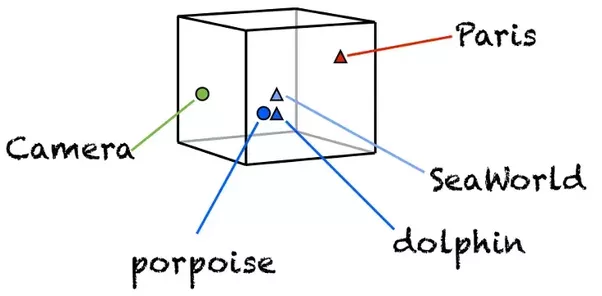

In [58]:
Image('images/embspace.png')

## 3.2 Word2Vec (обобщение контекстных эмбеддингов)

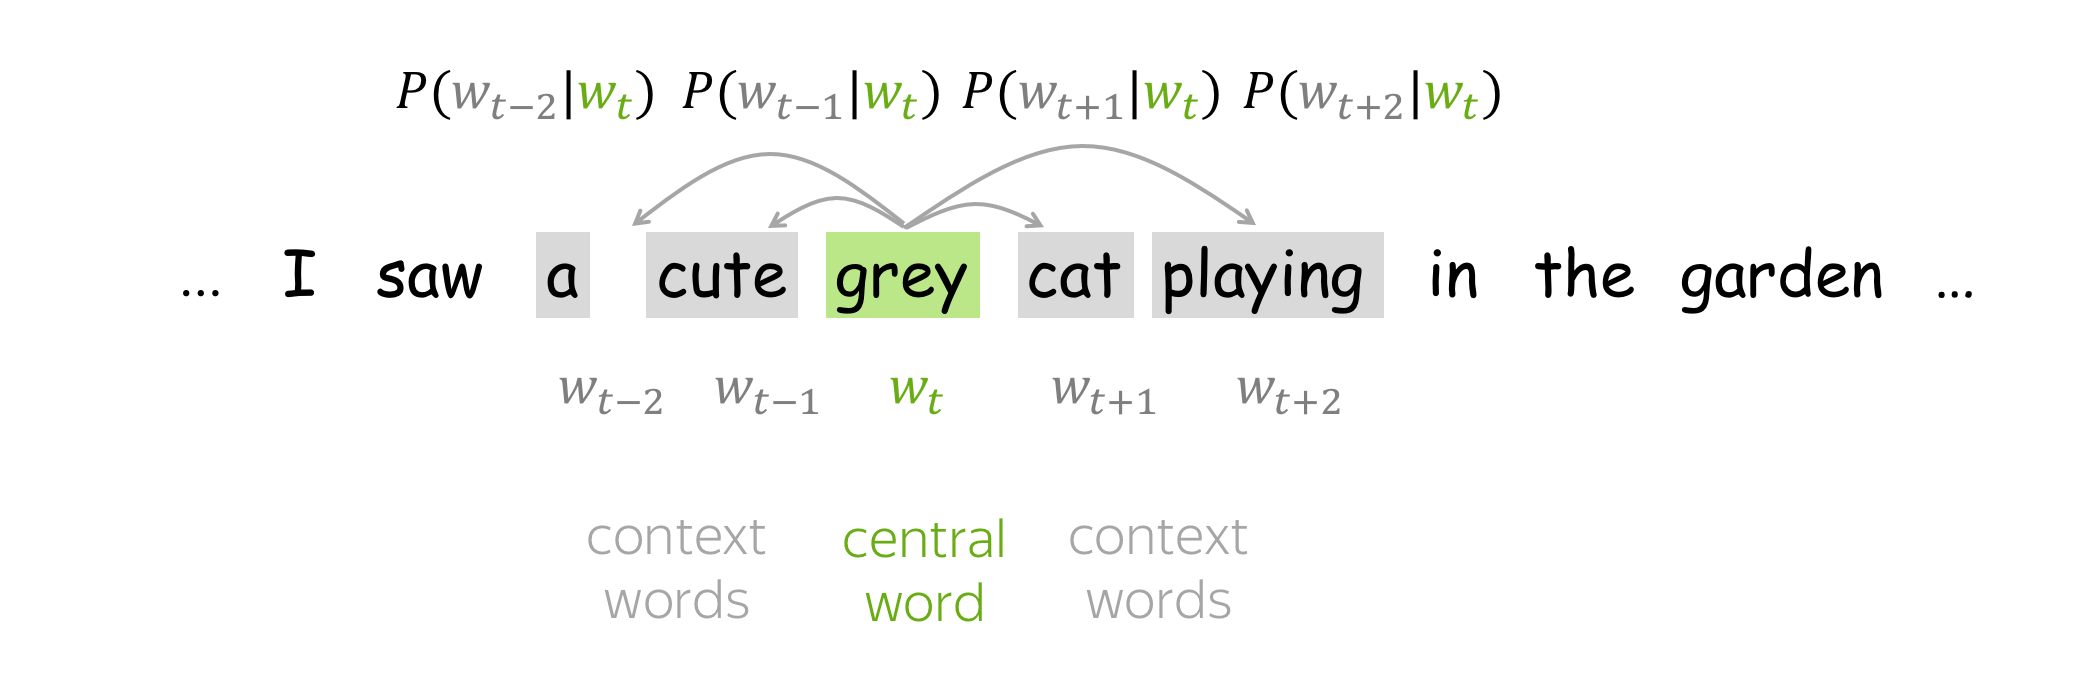

In [17]:
Image('images/window_prob3-min.png', width=600)

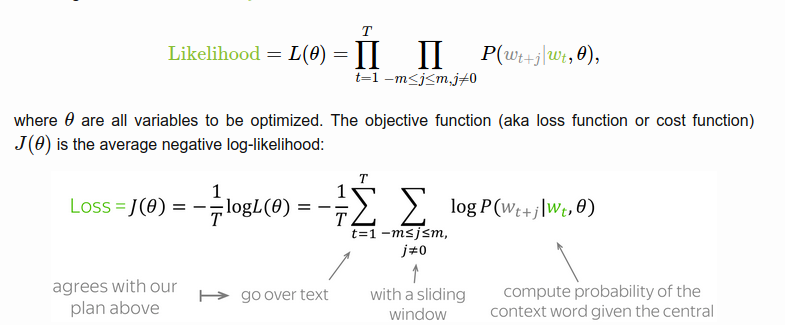

In [18]:
Image('images/WVLoss.png', width=600)

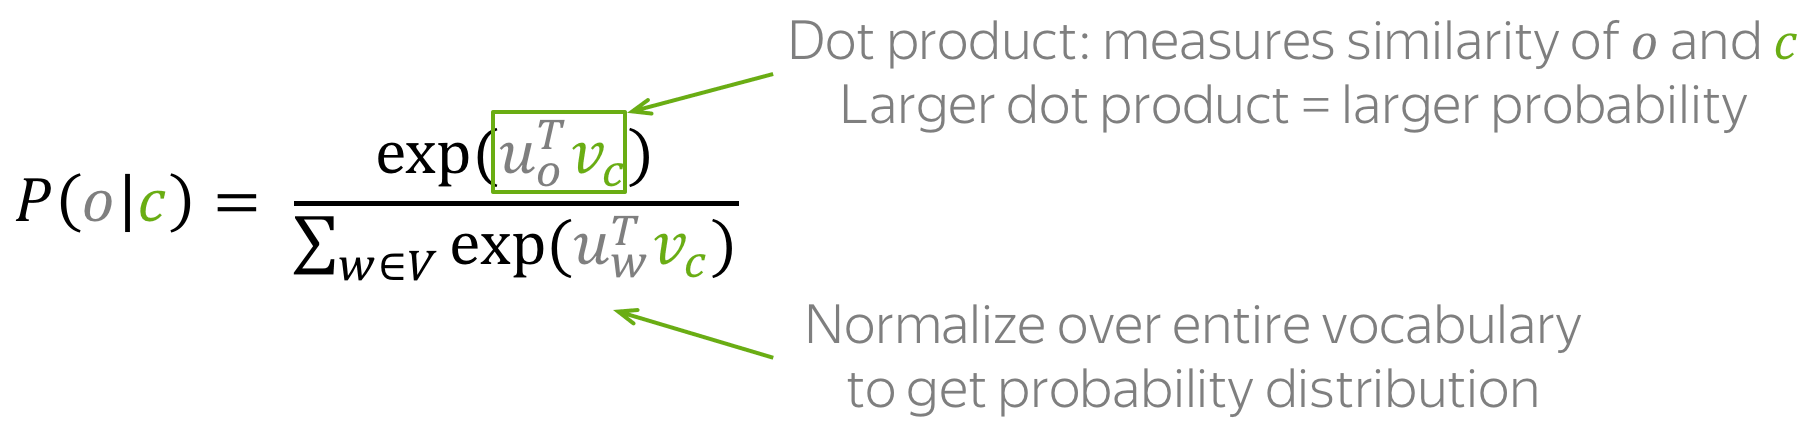

In [21]:
Image('images/prob_o_c-min.png', width=400)

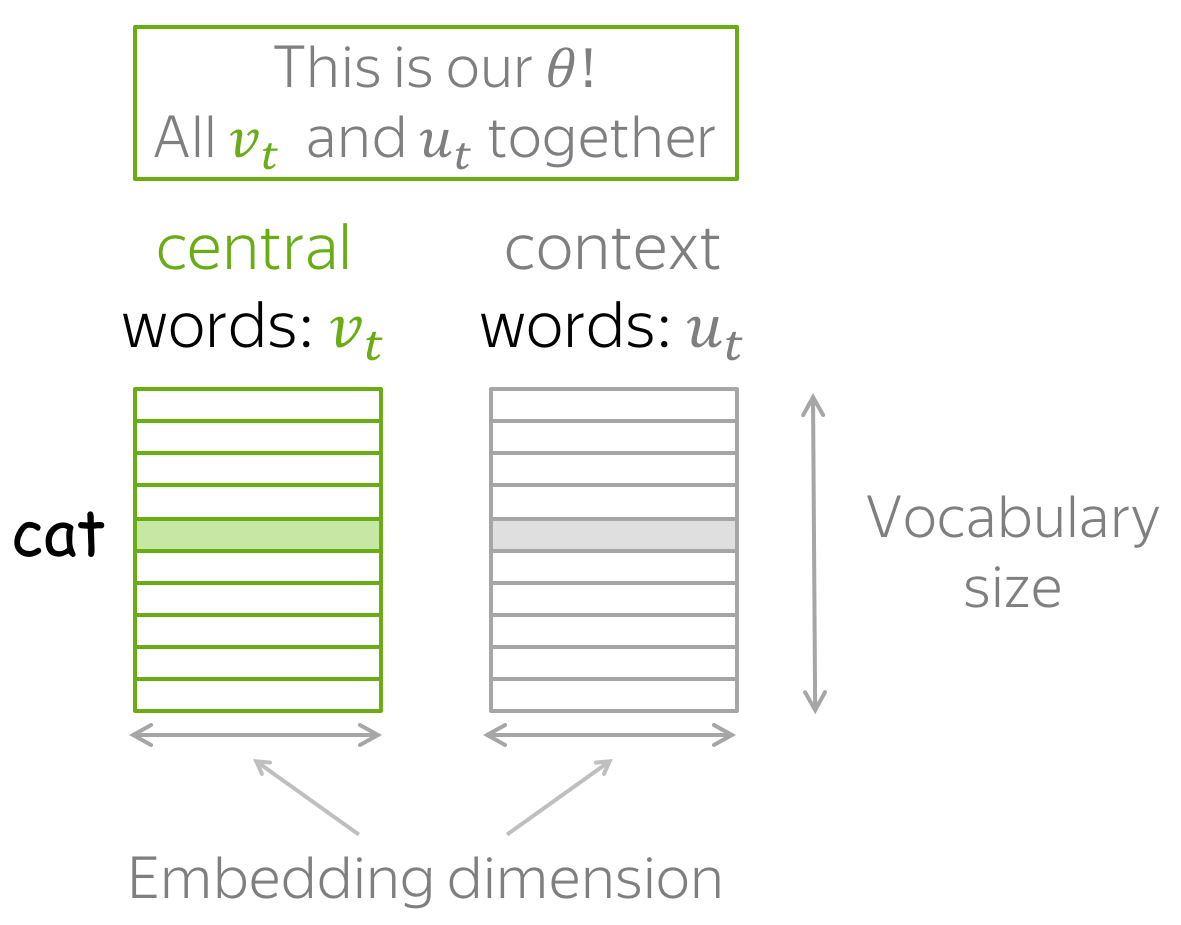

In [20]:
Image('images/two_vocs_with_theta-min.png', width=400)

Основная идея понятна, глубже спускаться не будем))

### Пример обучения word2vec

In [50]:
# токенизация
from nltk.tokenize import WordPunctTokenizer
data = list(open("data/quora.txt", encoding="utf-8")) # список вопросов с quora
tokenizer = WordPunctTokenizer()
data_tok = [tokenizer.tokenize(s.lower()) for s in data]
data_tok[4]

['why',
 'was',
 'george',
 'rr',
 'martin',
 'critical',
 'of',
 'jk',
 'rowling',
 'after',
 'losing',
 'the',
 'hugo',
 'award',
 '?']

In [51]:
# !pip install gensim
from gensim.models import Word2Vec

model = Word2Vec(data_tok[:100000], 
                 vector_size=10,      # embedding vector size
                 min_count=5,  # consider words that occured at least 5 times
                 window=5).wv  # define context as a 5-word window around the target word

In [52]:
model.get_vector('king')

array([-0.6014606 , -0.3938404 ,  0.5444762 , -1.1374062 ,  0.29488125,
       -0.08548529,  0.59552723,  0.2833654 , -1.9052697 , -1.0655731 ],
      dtype=float32)

In [58]:
model.most_similar('prince')

[('unicellular', 0.9867777228355408),
 ('mexicans', 0.9866304993629456),
 ('nra', 0.9856656193733215),
 ('jinping', 0.9847686290740967),
 ('diana', 0.9836628437042236),
 ('abortion', 0.9830849766731262),
 ('vein', 0.9828569293022156),
 ('assange', 0.9798845052719116),
 ('bjp', 0.979689359664917),
 ('voters', 0.9792304635047913)]

In [59]:
from scipy.spatial.distance import cosine

cosine(model.get_vector('king'), model.get_vector('prince'))

0.1412065625190735

In [60]:
cosine(model.get_vector('king'), model.get_vector('queen'))

0.10309475660324097

In [64]:
cosine(model.get_vector('house'), model.get_vector('castle'))

0.35044020414352417

### Большой предобученный Word2Vec

In [66]:
import gensim.downloader as api
model_wiki = api.load("glove-twitter-100") # предобученная модель на твитах

Можно делать так

In [67]:
model_wiki.get_vector('king')

array([-3.7500e-01, -2.7532e-01,  1.2489e-01, -9.2143e-02, -4.3104e-01,
        2.5268e-02, -4.1867e-02,  1.2848e-01, -7.9363e-02, -1.0011e-01,
        1.4076e-01,  1.0922e-01, -3.4546e+00, -6.9851e-01,  6.6580e-01,
        5.1494e-01,  4.5912e-01, -2.1957e-01,  4.4094e-01, -3.0631e-01,
        1.2293e-01, -9.9830e-02, -2.5755e-01, -6.1872e-01,  1.0613e+00,
       -9.4278e-01,  1.9284e-01, -8.2089e-02,  2.7782e-01, -1.8595e-01,
        2.9140e-02, -3.0870e-01, -3.9870e-01, -4.3038e-01,  3.8403e-01,
        3.3243e-01, -1.4446e-01,  1.6682e-01,  4.2301e-01, -2.6490e-01,
       -7.8106e-02, -4.6756e-01, -3.4039e-01, -1.3690e-01,  7.0890e-01,
       -4.8015e-01,  8.9183e-02, -2.3709e-01,  7.5124e-01,  2.0507e-01,
       -5.5263e-01, -3.8105e-01, -7.7082e-02,  3.6118e-01, -8.9840e-01,
       -5.3537e-01,  3.3161e-01, -1.3460e-01, -5.7742e-02,  1.9428e-01,
        1.8008e-01, -4.0697e-01,  2.6654e-03, -7.8771e-02, -2.3616e-01,
       -9.8115e-01, -1.6823e-01,  1.1459e-01, -2.7011e-01, -2.14

In [138]:
model_wiki.most_similar('muse')

[('coldplay', 0.8080717921257019),
 ('paramore', 0.7668760418891907),
 ('metallica', 0.7606366276741028),
 ('oasis', 0.7555792927742004),
 ('linkin', 0.7516505122184753),
 ('beatles', 0.7458093762397766),
 ('nirvana', 0.7320069670677185),
 ('aerosmith', 0.7288546562194824),
 ('maroon', 0.7187883853912354),
 ('radiohead', 0.7150726318359375)]

А можно вот так

In [70]:
model_wiki.most_similar(positive=["trump", "white"], negative=['black'])

[('donald', 0.6632781028747559),
 ('buffett', 0.6340493559837341),
 ('birther', 0.6288853287696838),
 ('christie', 0.5956118106842041),
 ('bloomberg', 0.5855364799499512),
 ('rogers', 0.5796603560447693),
 ('warren', 0.5790221095085144),
 ('perkins', 0.57811439037323),
 ('carney', 0.5749807953834534),
 ('rockefeller', 0.5736908316612244)]

In [76]:
model_wiki.most_similar(positive=["sex", "woman"], negative=['man'])

[('lesbian', 0.7230803370475769),
 ('porn', 0.7145015597343445),
 ('anal', 0.6531862616539001),
 ('erotic', 0.6530749797821045),
 ('milf', 0.6530406475067139),
 ('nude', 0.646248996257782),
 ('adult', 0.6460023522377014),
 ('pornstar', 0.6433337330818176),
 ('brunette', 0.6432666182518005),
 ('mature', 0.6389690637588501)]

In [133]:
model_wiki.most_similar(positive=["coder", "money"], negative=["brain"])

[('broker', 0.5820155739784241),
 ('bonuses', 0.5424473285675049),
 ('banker', 0.5385112762451172),
 ('designer', 0.5197198390960693),
 ('merchandising', 0.4964233338832855),
 ('treet', 0.49220192432403564),
 ('shopper', 0.4920561909675598),
 ('part-time', 0.4912828207015991),
 ('freelance', 0.4843311905860901),
 ('aupair', 0.47964534163475037)]

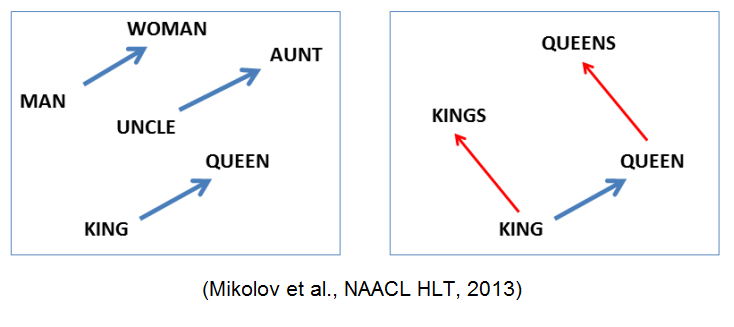

In [57]:
Image('images/analogies.png', width=600)

### Порисуем немного

Просто собираем набор слов

In [77]:
# соберем некоторый набор слов
from collections import Counter
from itertools import chain

pop_words = Counter(chain(*data_tok))
some_words = [word for word, count in pop_words.most_common(1000) if len(word) > 2 and not word.isdigit()] 

word_vectors = np.array([model_wiki.get_vector(word) for word in some_words])

Код рисовалки

In [78]:
import bokeh.models as bm, bokeh.plotting as pl
from bokeh.io import output_notebook
output_notebook()

def draw_vectors(x, y, radius=10, alpha=0.25, color='blue',
                 width=600, height=400, show=True, **kwargs):
    """ draws an interactive plot for data points with auxilirary info on hover """
    if isinstance(color, str): color = [color] * len(x)
    data_source = bm.ColumnDataSource({ 'x' : x, 'y' : y, 'color': color, **kwargs })

    fig = pl.figure(active_scroll='wheel_zoom', width=width, height=height)
    fig.scatter('x', 'y', size=radius, color='color', alpha=alpha, source=data_source)

    fig.add_tools(bm.HoverTool(tooltips=[(key, "@" + key) for key in kwargs.keys()]))
    if show: pl.show(fig)
    return fig

Loading BokehJS ...

### SVD

In [84]:
from sklearn.decomposition import PCA

# map word vectors onto 2d plane with PCA. Use good old sklearn api (fit, transform)
# after that, normalize vectors to make sure they have zero mean and unit variance
word_vectors_pca = PCA(n_components=2).fit_transform(word_vectors)


word_vectors_pca = (word_vectors_pca - word_vectors_pca.mean(0)) / (word_vectors_pca.std(0))

In [85]:
len(words)

NameError: name 'words' is not defined

In [86]:
draw_vectors(word_vectors_pca[:, 0], word_vectors_pca[:, 1], token=some_words)

Figure(id='1115', ...)

Сожмем вектора в 2-мерную проекцию. Можно через SVD, но мы воспользуемся более крутым способом __[TSNE](https://distill.pub/2016/misread-tsne/)__.

### TSNE

In [87]:
from sklearn.manifold import TSNE

word_tsne = TSNE(verbose=100).fit_transform(word_vectors)
word_tsne = (word_tsne - word_tsne.mean(0)) / word_tsne.std(0)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 897 samples in 0.001s...
[t-SNE] Computed neighbors for 897 samples in 0.047s...
[t-SNE] Computed conditional probabilities for sample 897 / 897
[t-SNE] Mean sigma: 1.583468
[t-SNE] Computed conditional probabilities in 0.055s
[t-SNE] Iteration 50: error = 75.9159851, gradient norm = 0.3334616 (50 iterations in 6.099s)
[t-SNE] Iteration 100: error = 74.9279633, gradient norm = 0.3376930 (50 iterations in 7.343s)
[t-SNE] Iteration 150: error = 75.6940002, gradient norm = 0.3387280 (50 iterations in 7.917s)
[t-SNE] Iteration 200: error = 76.5804901, gradient norm = 0.3243127 (50 iterations in 8.315s)
[t-SNE] Iteration 250: error = 76.7126312, gradient norm = 0.3052890 (50 iterations in 9.294s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.712631
[t-SNE] Iteration 300: error = 1.7798696, gradient norm = 0.0032968 (50 iterations in 6.561s)
[t-SNE] Iteration 350: error = 1.6753366, gradient norm = 0.0007708 (

In [88]:
draw_vectors(word_tsne[:, 0], word_tsne[:, 1], token=some_words)

Figure(id='1236', ...)

## 3.3 Embeddings in Neural Nets

In [78]:
from torch import nn, optim
import torch

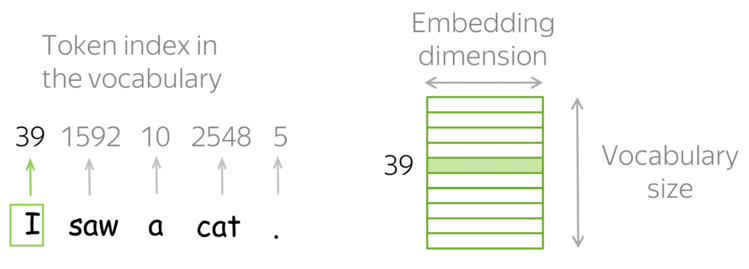

In [75]:
Image('images/lookup_table.gif', width=600)

Обучаем эмбеддинги вместе с оптимизацией нейронной сети

In [83]:
# an Embedding module containing 10 tensors of size 3
embedding = nn.Embedding(num_embeddings=10, 
                         embedding_dim = 3)

# a batch of 2 samples of 4 indices each
input = torch.LongTensor([[1, 2, 4, 5],[4, 3, 2, 9]]) # всего 10 токенов
embedding(input)

tensor([[[ 0.8310,  0.8753,  0.2929],
         [-0.7368,  0.5580, -1.3440],
         [ 0.4746,  1.7940,  0.8070],
         [ 0.3046, -0.5440,  1.0887]],

        [[ 0.4746,  1.7940,  0.8070],
         [ 0.7865,  1.0788,  1.5260],
         [-0.7368,  0.5580, -1.3440],
         [-0.9518, -0.2298, -1.6292]]], grad_fn=<EmbeddingBackward>)

In [137]:
 # FloatTensor containing pretrained weights
weight = torch.FloatTensor([[1, 2.3, 3], 
                            [4, 5.1, 6.3]])
embedding = nn.Embedding.from_pretrained(weight)
# Get embeddings for index 1
input = torch.LongTensor([1])
embedding(input)

tensor([[4.0000, 5.1000, 6.3000]])

### 3.4 Легкие эмбеддинги от Natasha 

In [90]:
from navec import Navec

path = 'navec_hudlit_v1_12B_500K_300d_100q.tar'
navec = Navec.load(path)

In [91]:
colors = [
 'бежевый',
 'белый',
 'бирюзовый',
 'бордовый',
 'бронза',
 'голубой',
 'горчичный',
 'желтый',
 'зеленый',
 'зеркальный',
 'золотой',
 'коралловый',
 'коричнево-красный',
 'коричневый',
 'красный',
 'кремовый',
 'лазурный',
 'лиловый',
 'малиновый',
 'медь',
 'оливковый',
 'оранжевый',
 'перламутровый',
 'прозрачный',
 'пурпурный',
 'разноцветный',
 'розовый',
 'салатовый',
 'светло-бежевый',
 'светло-желтый',
 'светло-зеленый',
 'светло-коричневый',
 'светло-розовый',
 'светло-серый',
 'светло-синий',
 'серебристый',
 'серый',
 'серый металлик',
 'синий',
 'сиреневый',
 'слоновая кость',
 'темно-бежевый',
 'темно-бордовый',
 'темно-зеленый',
 'темно-коричневый',
 'темно-розовый',
 'темно-серый',
 'темно-синий',
 'фиолетовый',
 'фуксия',
 'хаки',
 'хром',
 'черно-розовый',
 'черно-серый',
 'черный',
 'черный матовый',
 'шоколадный']

In [92]:
from scipy.spatial.distance import cosine

In [93]:
def get_vector(text):
    lst = re.split('-| ', text)
    a = []
    for word in lst:
        try:
            if len(word) > 0:
                a.append(navec[word])
        except:
            continue
    return sum(v for v in a) / len(lst)

In [94]:
def get_top5(cur_word, lst_words):
    a = [(lst_word, cosine(get_vector(cur_word), get_vector(lst_word))) for lst_word in lst_words]
    return sorted(a, key=lambda tup: tup[1])[:5]

In [96]:
import re

In [99]:
get_top5('металл', colors)

[('медь', 0.41584140062332153),
 ('бронза', 0.5381108224391937),
 ('черный матовый', 0.5876085758209229),
 ('хром', 0.6122124195098877),
 ('прозрачный', 0.6154731214046478)]

# Ссылки на источники
* [Лекция Deep Learning School](https://www.youtube.com/watch?v=d0oV1MZ_KdE&list=PL0Ks75aof3Ti1GDgeePUkCJWn02c0VDA5&index=1)
* [Сравнение PyMorphy2 и PyMystem3](https://habr.com/ru/post/503420/)
* [Курс Шада](https://github.com/yandexdataschool/nlp_course)
* [Лена Войта Эмбеддинги](https://lena-voita.github.io/nlp_course/word_embeddings.html)
* [Крутая либа для сегментации текста Razdel](https://natasha.github.io/razdel/)
* [Хабр эмбеддинги](https://habr.com/ru/company/ods/blog/329410/)
* [Co-occurrence](https://medium.com/@apargarg99/co-occurrence-matrix-singular-value-decomposition-svd-31b3d3deb305)